<font color=#cccccc>Credit Card customers (Predict Churning customers)</font>
==

<font color=#cccccc>Library Import</font>
==

In [2]:
import copy

import warnings
warnings.filterwarnings(action='ignore') 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

# 결측치
import missingno as msno

import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import model_selection, linear_model
from sklearn.metrics import auc

# 파이프라인
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Import libraries for resampling
import sklearn.neighbors._base

In [3]:
#ML Train model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from lightgbm.sklearn import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

In [4]:
#Resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN
from sklearn.model_selection import StratifiedShuffleSplit

In [5]:
!pip install vecstack==0.4.0
from vecstack import stacking

  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19880 sha256=f5d90fafd6a1505054640640ff5e921193e6bba226b5d1d04ef4261f75001284
  Stored in directory: /root/.cache/pip/wheels/28/fe/0c/fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack


In [6]:
!apt install fonts-nanum -y #한글font 사용하기

from matplotlib import font_manager, rc

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path, size=10)
rc('font', family='NanumBarunGothic')
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (36.6 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


<font color=#cccccc>Data Load</font>
==

In [ ]:
df = pd.read_csv('BankChurners.csv')
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


<font color=#cccccc>Data Information</font>
==

In [ ]:
# PLEASE IGNORE THE LAST 2 COLUMNS (NAIVE BAYES CLAS…). I SUGGEST TO RATHER DELETE IT BEFORE DOING ANYTHING**
# 이라고 계시자의 언급이 있었으므로 2 COLUMNS 와  Random Number/Index역할인 Client Number 는 삭제

df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
        axis=1, inplace=True )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
cat_col = [x for x in df.columns if df[x].dtype == 'O']
num_col = [x for x in df.columns if x not in cat_col]

print('cat_col : {} \n\
num_col : {}'.format(len(cat_col), len(num_col)))

cat_col : 6 
num_col : 14


### <font color=yellow>Categorical Column</font>

In [ ]:
# fig = plt.figure(figsize=(40, 20))
# fig.subplots_adjust(hspace=0.8, wspace=0.8)

# for i,var in enumerate(cat_col):
#     tmp = df[var].value_counts().reset_index()
#     ax = fig.add_subplot(2, 3, i+1)
#     ax.bar(tmp['index'], tmp[var], color=['dimgray','darkorange','limegreen','cornflowerblue','lightcoral','mediumpurple'])
#     ax.set_title(var, fontsize = 20)
#     ax.set_xticklabels(tmp['index'], rotation=90)
#     plt.xticks(color='#F3F781', fontsize =20) 
#     plt.yticks(color='#F3F781', fontsize =20) 


In [ ]:
def bar_chart(feature, ax=None): # feature <- 열 이름, ax <- subplot 객체 
    attrited = df[df['Attrition_Flag']=='Attrited Customer'][feature].value_counts()
    exist = df[df['Attrition_Flag']=='Existing Customer'][feature].value_counts()
    
    df_plot = pd.DataFrame([attrited, exist])
    df_plot.index = ['Attrited', 'Exist']
    
    df_plot.plot(kind='bar', stacked=True, ax=ax)

Text(0.5, 1.0, '카드등급')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


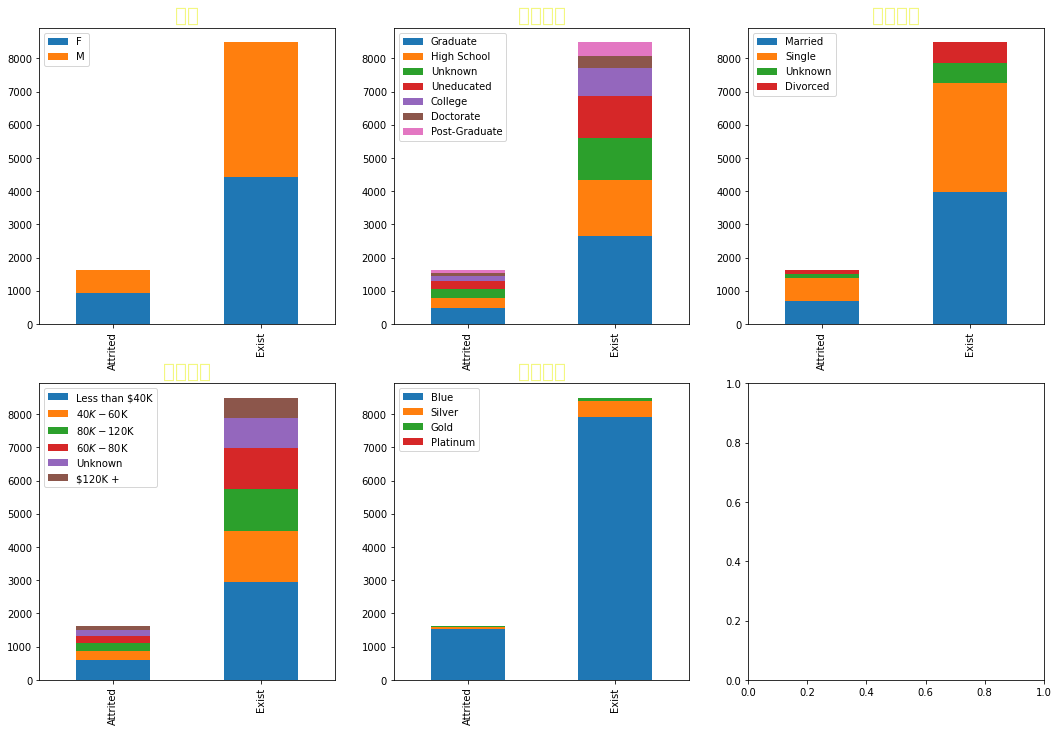

In [ ]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,12)


bar_chart('Gender', ax1)
bar_chart('Education_Level', ax2)
bar_chart('Marital_Status', ax3)
bar_chart('Income_Category', ax4)
bar_chart('Card_Category', ax5)

# ax1.set(title="성별")
ax1.set_title('성별', color='#F3F781', fontsize =20)
ax2.set_title('최종학력', color='#F3F781', fontsize =20)
ax3.set_title('결혼여부', color='#F3F781', fontsize =20)
ax4.set_title('소득수준', color='#F3F781', fontsize =20)
ax5.set_title('카드등급', color='#F3F781', fontsize =20)

### <font color=yellow>Numerical Column</font>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


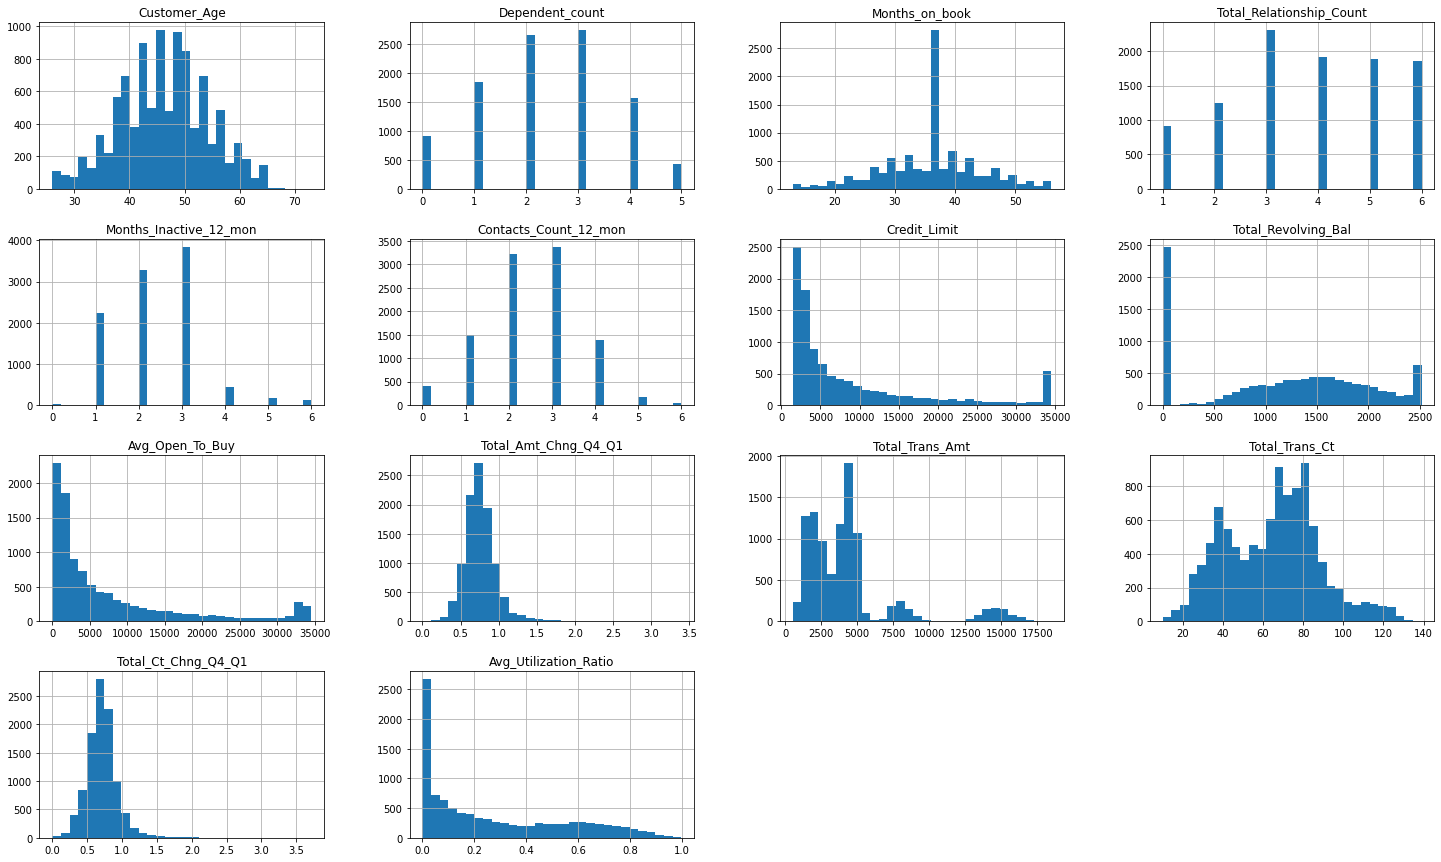

In [ ]:
df_num = df[num_col]
df_num.hist(bins=30, figsize=(25,15) );

###  <font color=yellow>Target Column Distribution(Categorical)</font>

In [1]:
data_explode = pd.read_csv('BankChurners.csv')
data_explode.drop(data_explode.columns[-2:], axis=1, inplace=True) 
data_explode.drop(data_explode.columns[0], axis=1, inplace=True)

#Use stratified sampling to split the dataset
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=10)

for train_index, test_index in split.split(data_explode, data_explode["Attrition_Flag"]):
    train_set = data_explode.loc[train_index]
    test_set = data_explode.loc[test_index]
    
target = 'Attrition_Flag'
train_set[target] = train_set[target].map({'Existing Customer':0, 'Attrited Customer':1})
test_set[target] = test_set[target].map({'Existing Customer':0, 'Attrited Customer':1})

churn = train_set.copy()

num_vars = list(churn.select_dtypes(include=[np.number]).columns)
cat_vars = list(churn.select_dtypes(include=['object']).columns)
num_vars.remove('Attrition_Flag')

NameError: ignored

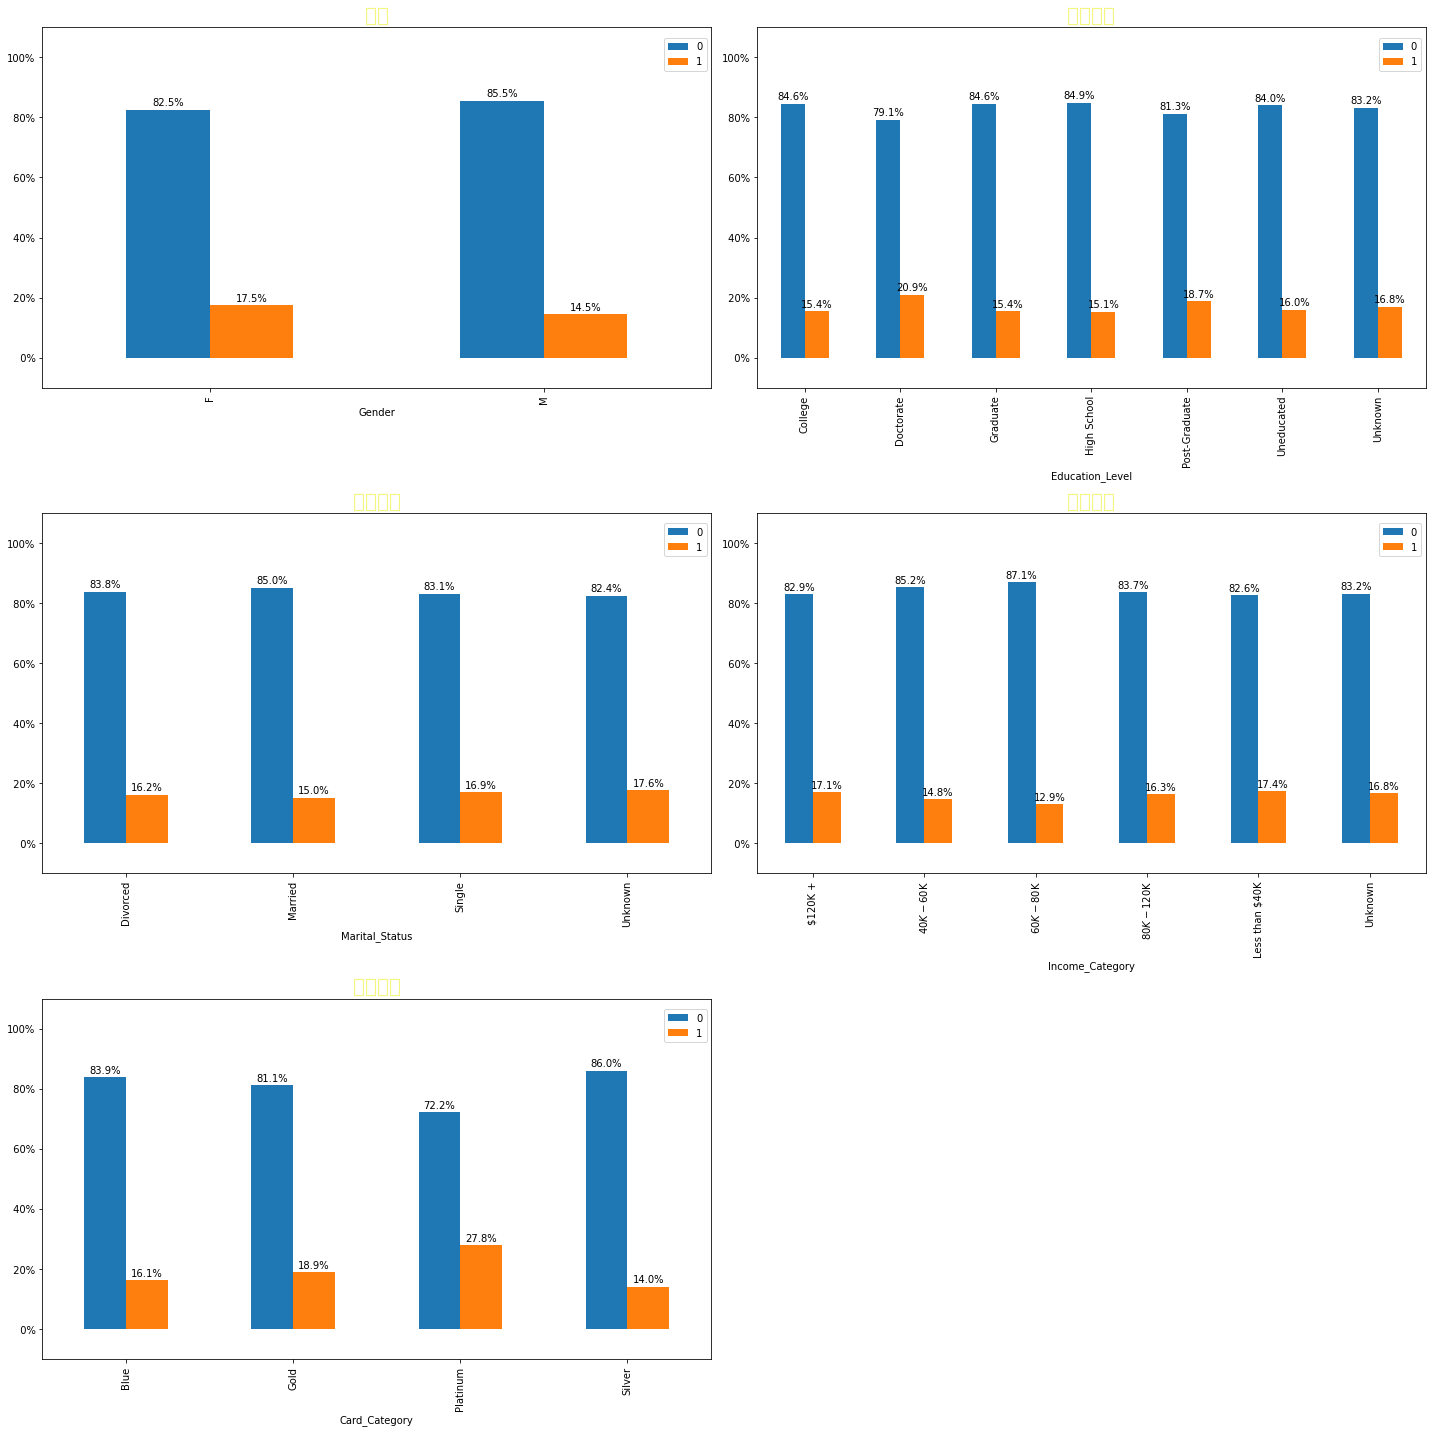

In [ ]:
def plt_hue_cat(df, cat, target='Attrition_Flag', title=None, ax=None):
    #Create crosstab
    table = pd.crosstab(index=df[cat], columns=churn[target], normalize='index')
    
    if ax==None:
        fig, ax = plt.subplots()
    table.plot.bar(ax=ax)
    
    max_height = max([p.get_height() for p in ax.patches])
    min_height = min([p.get_height() for p in ax.patches])
    
    for i,p in enumerate(ax.patches):
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{table.unstack().iloc[i]:.1%}', (x + width/2, y+height+min_height*0.1), ha='center')
         
    
    ylim=max_height+max_height
    ax.set_ylim(-.1, 1.1)
    y_vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x * 100) for x in y_vals])
    
    
    if title==None:
        title=cat
        if title == 'Gender':
            title = '성별'
        elif title == 'Education_Level':
            title = '최종학력'
        elif title == 'Marital_Status':
            title = '결혼여부'
        elif title == 'Income_Category':
            title = '소득수준'
        else :
                title = '카드등급'
    ax.set_title(title, color='#F3F781', fontsize =20)
    ax.legend(loc=(0.93,0.88))
    plt.tight_layout()
    
rows = len(cat_vars)//2+1
fig, axes = plt.subplots(rows, 2, figsize=(20,20))
axes = axes.ravel()
axes[-1].remove()

for i in range(len(cat_vars)):
    cat = cat_vars[i]
    plt_hue_cat(df=churn, cat=cat, ax=axes[i])

plt.show()


###  <font color=yellow>Target Column Distribution(Numerical)</font>

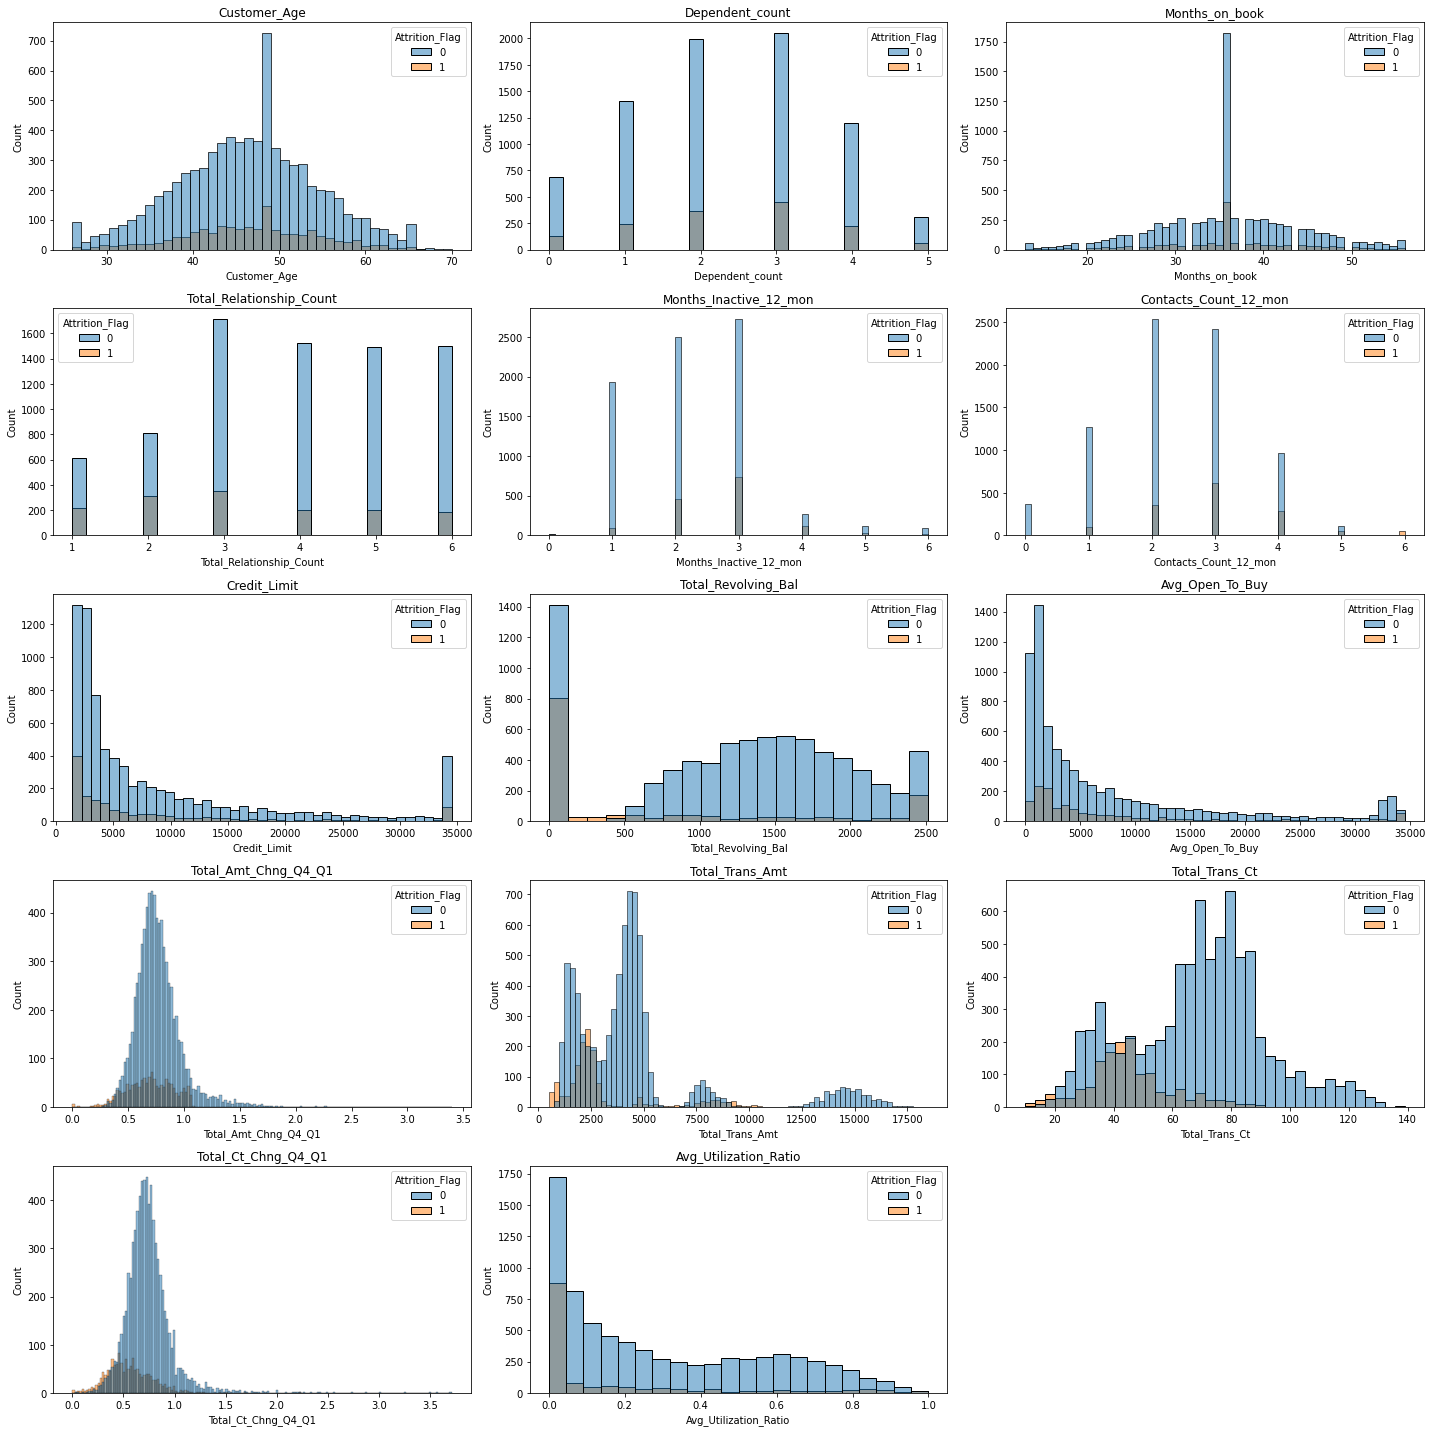

In [ ]:
def plt_hue_num(df, num_var, target='Attrition_Flag', title=None, ax=None):
    
    if ax==None:
        fig, ax = plt.subplots()
    
    sns.histplot(df, x=num_var, hue=target, ax=ax)

    if title==None:
        title=num_var
        
    ax.set_title(title)
    plt.tight_layout()
    
rows = len(num_vars)//3+1
fig, axes = plt.subplots(rows, 3, figsize=(20,20))
axes = axes.ravel()
axes[-1].remove()

for i in range(len(num_vars)):
    num_var = num_vars[i]
    plt_hue_num(churn, num_var, target='Attrition_Flag', ax=axes[i])    
    plt.tight_layout()
     
plt.show()

### <font color=yellow>Target Column (삭제?)</font>

In [ ]:
# plt.figure(figsize=(10,5))
# g= sns.countplot(x='Attrition_Flag', data=df);
# for p in g.patches:
#     height = p.get_height()
#     g.text(p.get_x()+p.get_width()/2.,
#             height/2,
#             '{}'.format(height),
#             ha="center", color='white')
# plt.title('Count values to target variable')

# <font color=#cccccc>결측치 확인 / Feature engineering & Feature selection</font>

### <font color=yellow>결측치 처리 방법 1. 결측치 포함 행 삭제</font>

#### <font color=yellow>Preprocessing categorical data (text -> number)</font>

In [ ]:
data_df = df.copy()

In [7]:
data_df[data_df== 'Unknown'].count()

NameError: ignored

In [ ]:
print(data_df['Education_Level'].value_counts())
print()
print(data_df['Marital_Status'].value_counts())
print()
print(data_df['Income_Category'].value_counts())

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


In [ ]:
catg_features = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category'] #범주형데이터열

# 결측치가 포함된 열을 알려주는 함수
def hasUnknown(feature): 
    result = 0
    for x in data_df[feature].str.contains('Unknown'):
        if x == True: #
            result = 1
    if result == 1:
        print('{} : has string "Unknown"!'.format(feature))

# Unknown문자열이 포함된 셀을 결측치(NaN)로 변형시키는 코드
for feature in catg_features: 
    hasUnknown(feature)
    data_df.loc[data_df[feature] == 'Unknown', feature] = np.nan 

data_df.info()

Education_Level : has string "Unknown"!
Marital_Status : has string "Unknown"!
Income_Category : has string "Unknown"!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 1

In [ ]:
index_dicts = {}
for cat_feature in catg_features:
    data_df[cat_feature] = data_df[cat_feature].astype('category')
    idx_list = dict(enumerate(data_df[cat_feature].cat.categories)) 
    index_dicts[cat_feature] = idx_list
index_dicts

{'Card_Category': {0: 'Blue', 1: 'Gold', 2: 'Platinum', 3: 'Silver'},
 'Education_Level': {0: 'College',
  1: 'Doctorate',
  2: 'Graduate',
  3: 'High School',
  4: 'Post-Graduate',
  5: 'Uneducated'},
 'Gender': {0: 'F', 1: 'M'},
 'Income_Category': {0: '$120K +',
  1: '$40K - $60K',
  2: '$60K - $80K',
  3: '$80K - $120K',
  4: 'Less than $40K'},
 'Marital_Status': {0: 'Divorced', 1: 'Married', 2: 'Single'}}

In [ ]:
# 문자열 카테고리를 index번호(카테고리번호)로 replace
for cat_feature in catg_features:
    for k,v in index_dicts[cat_feature].items():
        data_df[cat_feature].replace(v,k, inplace=True) 

# y 데이터 변환
data_df.Attrition_Flag = data_df.Attrition_Flag.apply(lambda x: 1 if 'Existing' in x else 0)

#### <font color=yellow>결측치 제거</font>



In [ ]:
#결측치 제거
data_df.dropna(inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            7081 non-null   int64   
 1   Customer_Age              7081 non-null   int64   
 2   Gender                    7081 non-null   category
 3   Dependent_count           7081 non-null   int64   
 4   Education_Level           7081 non-null   category
 5   Marital_Status            7081 non-null   category
 6   Income_Category           7081 non-null   category
 7   Card_Category             7081 non-null   category
 8   Months_on_book            7081 non-null   int64   
 9   Total_Relationship_Count  7081 non-null   int64   
 10  Months_Inactive_12_mon    7081 non-null   int64   
 11  Contacts_Count_12_mon     7081 non-null   int64   
 12  Credit_Limit              7081 non-null   float64 
 13  Total_Revolving_Bal       7081 non-null   int64

In [ ]:
# 결측치를 제거하며, 빠진 인덱스값을 재정의

data_df = data_df.reset_index()
del data_df['index']
data_df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
4,1,44,1,2,2,1,1,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [ ]:
#category int로 바꾸기 (pipeline이 category을 못알아먹음)
for cat_feature in catg_features:
    data_df[cat_feature] = data_df[cat_feature].astype(int)

### <font color=yellow>결측치 처리 방법 2. 결측치 채우기</font>

#### <font color=yellow>Preprocessing categorical data (text -> number)</font>

In [ ]:
data_df = df.copy()

In [ ]:
catg_features = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category'] #범주형데이터열

# 결측치가 포함된 열을 알려주는 함수
def hasUnknown(feature): 
    result = 0
    for x in data_df[feature].str.contains('Unknown'):
        if x == True: #
            result = 1
    if result == 1:
        print('{} : has string "Unknown"!'.format(feature))

# Unknown문자열이 포함된 셀을 결측치(NaN)로 변형시키는 코드
for feature in catg_features: 
    hasUnknown(feature)
    data_df.loc[data_df[feature] == 'Unknown', feature] = np.nan 

data_df.info()

Education_Level : has string "Unknown"!
Marital_Status : has string "Unknown"!
Income_Category : has string "Unknown"!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 1

In [ ]:
# 범주형 변수 열 카테고리에 자동으로 부여될 index를 담는 딕셔너리 생성 코드
index_dicts = {}
for cat_feature in catg_features:
    data_df[cat_feature] = data_df[cat_feature].astype('category')
    idx_list = dict(enumerate(data_df[cat_feature].cat.categories)) 
    index_dicts[cat_feature] = idx_list
index_dicts

{'Card_Category': {0: 0, 1: 1, 2: 2, 3: 3},
 'Education_Level': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
 'Gender': {0: 0, 1: 1},
 'Income_Category': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'Marital_Status': {0: 0, 1: 1, 2: 2}}

In [ ]:
# 문자열 카테고리를 index번호(카테고리번호)로 replace
for cat_feature in catg_features:
    for k,v in index_dicts[cat_feature].items():
        data_df[cat_feature].replace(v,k, inplace=True) 

# y 데이터 변환
data_df.Attrition_Flag = data_df.Attrition_Flag.apply(lambda x: 1 if 'Existing' in x else 0)

TypeError: ignored

#### <font color=yellow>결측치 채우기</font>
참고) https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779 

In [ ]:
# 방법 1) KNNImputer로 결측치 추가
from sklearn.impute import KNNImputer

imputer_KNN = KNNImputer(n_neighbors=30)
df_filled_KNN = imputer_KNN.fit_transform(df)
df_filled_KNN = pd.DataFrame(df_filled_KNN).round(decimals=0)
df_filled_KNN.columns = sdf.columns
df_filled_KNN.head()

ValueError: ignored

In [ ]:
#category int로 바꾸기 (pipeline이 category을 못알아먹음)
for cat_feature in catg_features:
    data_df[cat_feature] = data_df[cat_feature].astype(int)

ValueError: ignored

<font color=#cccccc>correlation matrix</font>
==

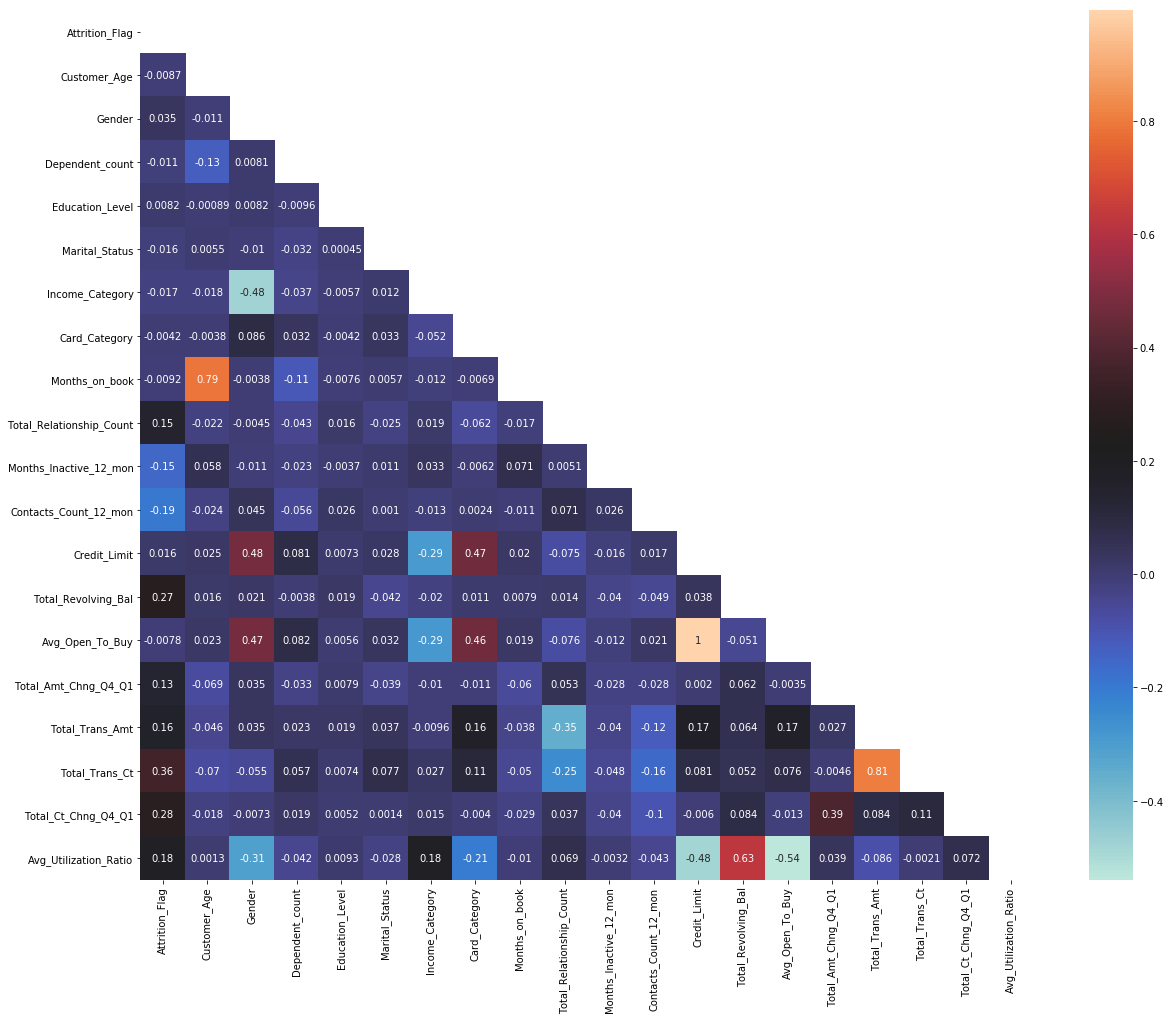

In [ ]:
fig, ax = plt.subplots(figsize=(20, 16))
df_corr = data_df.corr(method="pearson")
mask = np.zeros_like(np.array(df_corr))
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df_corr, mask=mask, annot=True, cmap='icefire')

#결측치도 채워진 상태이며, 크게 상관계수가 튄다고 생각되는 열이 없음 열삭제 없이 그냥 진행

<font color=#cccccc>데이터 분리</font>
==

In [ ]:
x_data = data_df.drop(['Attrition_Flag'], axis=1)
y_data = data_df['Attrition_Flag']

<font color=#cccccc>Train the model</font>
==

In [ ]:
x_train, x_test, y_train, y_test =\
model_selection.train_test_split(x_data, y_data, test_size=0.3, random_state=0)

### <font color=yellow>Feature Scaling(Pipeline)</font>

In [ ]:
categorical_features = ['Card_Category', 'Education_Level', 'Gender', 'Income_Category', 'Marital_Status']
categorical_transformer = OneHotEncoder(categories='auto') # categories='auto' : just for ignoring warning messages

temp = list(data_df[data_df.columns.difference(categorical_features)].columns)
temp.remove('Attrition_Flag')

numeric_features = temp
numeric_transformer = StandardScaler()


preprocessor = ColumnTransformer(
    transformers=[ # List of (name, transformer, column(s))
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


preprocessor_pipe = Pipeline(steps=[('preprocessor', preprocessor)])

preprocessor_pipe.fit(x_train)

x_train_transformed = preprocessor_pipe.transform(x_train)
x_test_transformed = preprocessor_pipe.transform(x_test)

pd.DataFrame(x_train_transformed)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.748406,1.867430,-0.396875,-0.643042,-0.031516,0.503334,0.661574,0.382646,-0.072588,-0.248166,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.465262,-0.136514,1.409288,-0.483890,0.465118,-1.042699,-1.355504,0.506545,-0.529711,-0.227189,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.645385,-1.004532,-0.396875,-0.773617,-0.528149,0.503334,0.661574,-0.732443,-0.309941,-0.877476,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.661164,-0.843788,-0.396875,0.603356,-0.900624,-0.269682,1.670113,-0.236848,-0.274777,-0.206212,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.340494,-1.004532,0.506206,-0.468502,1.085910,-1.042699,1.670113,1.249938,0.498816,-0.420177,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,1.505764,-0.697332,-0.396875,1.598057,-0.900624,-1.042699,-0.346965,-0.856342,-0.024239,-0.105522,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4952,-0.256693,-0.450858,0.506206,-0.283961,-0.155674,-0.269682,-0.346965,-1.351937,-1.290118,0.053903,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4953,-0.630997,0.642202,-0.396875,-0.609849,-1.645575,-1.042699,0.661574,0.010950,-0.081379,-1.066269,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4954,1.285004,-1.004532,0.506206,1.158190,0.713435,0.503334,-1.355504,1.373837,-1.527470,-1.666211,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
pipeline_features = [x for x in x_data.columns if x not in categorical_features] #x_data의 열들 중 범주형 데이터를 제외한 열들 리스트에 담기

categorical_features = ['Card_Category', 'Education_Level', 'Gender', 'Income_Category', 'Marital_Status']


for category in categorical_features: #범주형 데이터속 범주들을 하나씩 꺼내어 열들에 추가하기
  for i in list(df[category].value_counts().keys()):
      pipeline_features.append(i)  

#위에 pipeline이 categorical_features 리스트 순서대로 들어갔기 때문에 순서 그대로 뽑아낸 코드

for i in range(pipeline_features.count('Unknown')): #겹쳐진 Unknown들 제거
  pipeline_features.remove('Unknown')

x_train_transformed_df = pd.DataFrame(x_train_transformed) #x_train_transformed로 df 만들기

x_train_transformed_df.columns = pipeline_features #x_train_transformed_df의 열들 이름을 pipeline_features 리스트로 변경

x_train_transformed_df

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,F,M,Less than $40K,$40K - $60K,$80K - $120K,$60K - $80K,$120K +,Married,Single,Divorced
0,-0.748406,1.867430,-0.396875,-0.643042,-0.031516,0.503334,0.661574,0.382646,-0.072588,-0.248166,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.465262,-0.136514,1.409288,-0.483890,0.465118,-1.042699,-1.355504,0.506545,-0.529711,-0.227189,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.645385,-1.004532,-0.396875,-0.773617,-0.528149,0.503334,0.661574,-0.732443,-0.309941,-0.877476,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.661164,-0.843788,-0.396875,0.603356,-0.900624,-0.269682,1.670113,-0.236848,-0.274777,-0.206212,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.340494,-1.004532,0.506206,-0.468502,1.085910,-1.042699,1.670113,1.249938,0.498816,-0.420177,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,1.505764,-0.697332,-0.396875,1.598057,-0.900624,-1.042699,-0.346965,-0.856342,-0.024239,-0.105522,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4952,-0.256693,-0.450858,0.506206,-0.283961,-0.155674,-0.269682,-0.346965,-1.351937,-1.290118,0.053903,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4953,-0.630997,0.642202,-0.396875,-0.609849,-1.645575,-1.042699,0.661574,0.010950,-0.081379,-1.066269,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4954,1.285004,-1.004532,0.506206,1.158190,0.713435,0.503334,-1.355504,1.373837,-1.527470,-1.666211,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### <font color=yellow>LogisticRegression</font>

In [ ]:
clf_LR = LogisticRegression(random_state=0)
clf_LR.fit(x_train_transformed_df, y_train)
clf_LR_pred=clf_LR.predict(x_test_transformed)

print('accuracy: %.4f' % accuracy_score(y_test, clf_LR_pred))
print('precision: %.4f' % precision_score(y_test, clf_LR_pred))
print('recall: %.4f' % recall_score(y_test, clf_LR_pred))
print('F1: %.4f' % f1_score(y_test, clf_LR_pred))

accuracy: 0.9031
precision: 0.9237
recall: 0.9664
F1: 0.9446


### <font color=yellow>XGBClassifier</font>

In [ ]:
clf_XGB = XGBClassifier(random_state=0)
clf_XGB.fit(x_train_transformed, y_train)
clf_XGB_pred=clf_XGB.predict(x_test_transformed)

print('accuracy: %.4f' % accuracy_score(y_test, clf_XGB_pred))
print('precision: %.4f' % precision_score(y_test, clf_XGB_pred))
print('recall: %.4f' % recall_score(y_test, clf_XGB_pred))
print('F1: %.4f' % f1_score(y_test, clf_XGB_pred))

accuracy: 0.9704
precision: 0.9741
recall: 0.9917
F1: 0.9828


### <font color=yellow>LGBMClassifier</font>

In [ ]:
clf_LGBM = LGBMClassifier(random_state=0)
clf_LGBM.fit(x_train_transformed_df, y_train)
clf_LGBM_pred=clf_LGBM.predict(x_test_transformed)

print('accuracy: %.4f' % accuracy_score(y_test, clf_LGBM_pred))
print('precision: %.4f' % precision_score(y_test, clf_LGBM_pred))
print('recall: %.4f' % recall_score(y_test, clf_LGBM_pred))
print('F1: %.4f' % f1_score(y_test, clf_LGBM_pred))

accuracy: 0.9741
precision: 0.9825
recall: 0.9873
F1: 0.9849


### <font color=yellow>confusion_matrix</font>

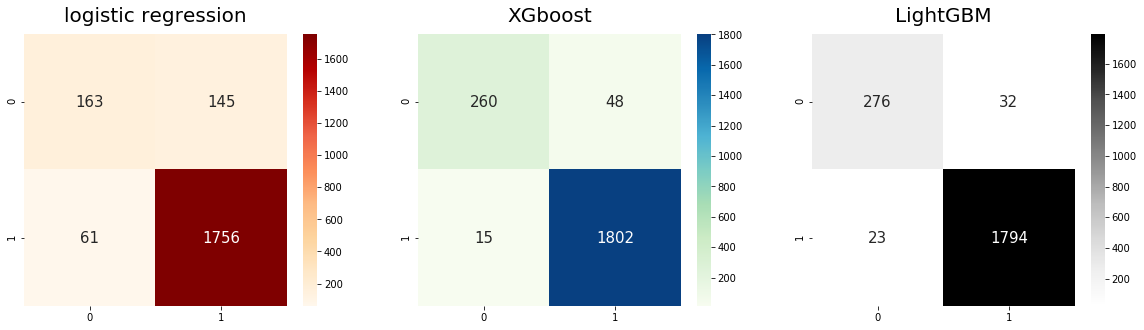

In [ ]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 5))

confu = confusion_matrix(y_true = y_test, y_pred = clf_LR_pred)
confu2 = confusion_matrix(y_true = y_test, y_pred = clf_XGB_pred)
confu3 = confusion_matrix(y_true = y_test, y_pred = clf_LGBM_pred)


sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g', ax=ax[0])
sns.heatmap(confu2, annot=True, annot_kws={'size':15}, cmap='GnBu', fmt='.10g', ax=ax[1])
sns.heatmap(confu3, annot=True, annot_kws={'size':15}, cmap='Greys', fmt='.10g', ax=ax[2])
ax[0].set_title('logistic regression',pad = 12, fontsize = 20)
ax[1].set_title('XGboost',pad = 12, fontsize = 20)
ax[2].set_title('LightGBM',pad = 12, fontsize = 20)
plt.show()

### <font color=yellow>get important features</font>

In [ ]:
feature_importance_values = clf_LGBM.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=x_train_transformed_df.columns)
# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()

NameError: ignored

<font color=#cccccc>Rebalancing Samples</font>
==

### <font color=yellow>Resampling train-data</font>

In [ ]:
# Random Oversampling
over_x_train, over_y_train = RandomOverSampler(sampling_strategy='minority').fit_resample(x_train, y_train)

# SMOTE
smote_x_train, smote_y_train = SMOTE().fit_resample(x_train,y_train)

# Boderline-SMOTE
bdlsmote_x_train, bdlsmote_y_train = BorderlineSMOTE().fit_resample(x_train, y_train)

# Boderline-SMOTE SVM
bdlSVMsmote_x_train, bdlSVMsmote_y_train = SVMSMOTE().fit_resample(x_train, y_train)

# ADASYN
adasyn_x_train, adasyn_y_train = ADASYN().fit_resample(x_train, y_train)

# SMOTE-TomekLinks
smotetomek_x_train, smotetomek_y_train = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')).fit_resample(x_train, y_train)

# SMOTE-ENN
smoteenn_x_train, smoteenn_y_train = SMOTEENN().fit_resample(x_train, y_train)


# StratifiedShuffleSplit (계층적 샘플링 시도)
split = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
# StratifiedShuffleSplit의 메소드 split로 train, test를 분할할 index 생성
for train_index, test_index in split.split(x_data, y_data):
    sss_x_train, sss_x_test = x_data.loc[train_index], x_data.loc[test_index]
    sss_y_train, sss_y_test = y_data.loc[train_index], y_data.loc[test_index]

NameError: ignored

### <font color=yellow>Resampling result</font>

In [ ]:
# Random Oversampling
print("Random Oversampling\n", over_y_train.value_counts())
# SMOTE
print("SMOTE\n", smote_y_train.value_counts())
# Boderline-SMOTE
print("Borderline-SMOTE\n", bdlsmote_y_train.value_counts())
# Boderline-SMOTE SVM
print("Borderline-SMOTE SVM\n", bdlSVMsmote_y_train.value_counts())
# ADASYN
print("ADASYN\n", adasyn_y_train.value_counts())
# SMOTE-TomekLinks
print("SMOTE-TomekLinks\n", smotetomek_y_train.value_counts())
# SMOTE-ENN
print("SMOTE-ENN\n", smoteenn_y_train.value_counts())

Random Oversampling
 1    4151
0    4151
Name: Attrition_Flag, dtype: int64
SMOTE
 1    4151
0    4151
Name: Attrition_Flag, dtype: int64
Borderline-SMOTE
 1    4151
0    4151
Name: Attrition_Flag, dtype: int64
Borderline-SMOTE SVM
 1    4151
0    4151
Name: Attrition_Flag, dtype: int64
ADASYN
 0    4165
1    4151
Name: Attrition_Flag, dtype: int64
SMOTE-TomekLinks
 1    4151
0    4003
Name: Attrition_Flag, dtype: int64
SMOTE-ENN
 0    3524
1    3264
Name: Attrition_Flag, dtype: int64


### <font color=yellow>Resampling result Visualize</font>

In [ ]:
datasets = [x_train_transformed, y_train, over_x_train, over_y_train, smote_x_train, smote_y_train,
            bdlsmote_x_train, bdlsmote_y_train, bdlSVMsmote_x_train, bdlSVMsmote_y_train, 
            adasyn_x_train, adasyn_y_train, smotetomek_x_train, smotetomek_y_train, 
            smoteenn_x_train, smoteenn_y_train]

for dataset in datasets:
    pd.DataFrame(dataset)

In [ ]:
train_concat = pd.concat([x_train, y_train], axis=1)
over_train_concat = pd.concat([over_x_train, over_y_train], axis=1)
smote_train_concat = pd.concat([smote_x_train, smote_y_train], axis=1)
bdlsmote_train_concat = pd.concat([bdlsmote_x_train, bdlsmote_y_train], axis=1)
bdlSVMsmote_train_concat = pd.concat([bdlSVMsmote_x_train, bdlSVMsmote_y_train], axis=1)
adasyn_train_concat = pd.concat([adasyn_x_train, adasyn_y_train], axis=1)
smotetomek_train_concat = pd.concat([smotetomek_x_train, smotetomek_y_train], axis=1)
smoteenn_train_concat = pd.concat([smoteenn_x_train, smoteenn_y_train], axis=1)

Text(0.5, 1.0, 'SMOTE-ENN')

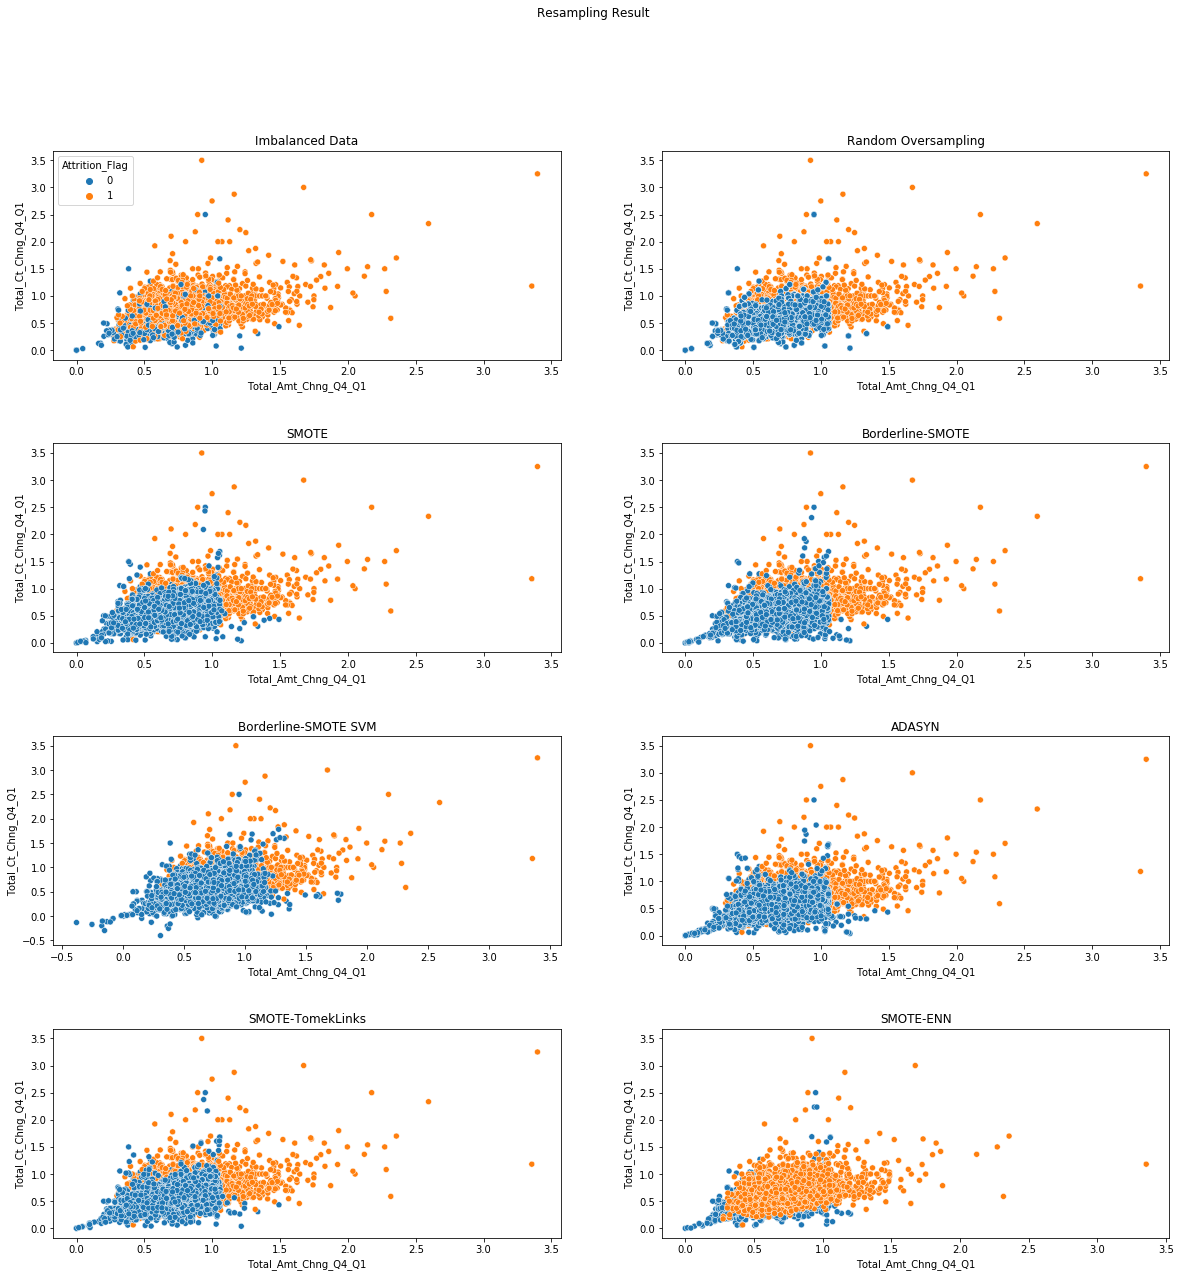

In [ ]:
# Visualize resampling results
fig, axes = plt.subplots(4, 2, figsize=(20, 20),squeeze=True)
plt.subplots_adjust(wspace=0.2, hspace=0.4)
fig.suptitle('Resampling Result')

sns.scatterplot(ax=axes[0, 0], data=train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag')
sns.scatterplot(ax=axes[0, 1], data=over_train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag', legend=False)
sns.scatterplot(ax=axes[1, 0], data=smote_train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag',legend=False)
sns.scatterplot(ax=axes[1, 1], data=bdlsmote_train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag',legend=False)
sns.scatterplot(ax=axes[2, 0], data=bdlSVMsmote_train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag',legend=False)
sns.scatterplot(ax=axes[2, 1], data=adasyn_train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag',legend=False)
sns.scatterplot(ax=axes[3, 0], data=smotetomek_train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag',legend=False)
sns.scatterplot(ax=axes[3, 1], data=smoteenn_train_concat, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag',legend=False)

axes[0, 0].set_title("Imbalanced Data")
axes[0, 1].set_title("Random Oversampling")
axes[1, 0].set_title("SMOTE")
axes[1, 1].set_title("Borderline-SMOTE")
axes[2, 0].set_title("Borderline-SMOTE SVM")
axes[2, 1].set_title("ADASYN")
axes[3, 0].set_title("SMOTE-TomekLinks")
axes[3, 1].set_title("SMOTE-ENN")

<font color=#cccccc>Re_Train the model</font>
==

### <font color=yellow>LogisticRegression</font>

In [ ]:
x_train_transformed_resample = preprocessor_pipe.transform(over_x_train)
x_test_transformed_resample = preprocessor_pipe.transform(x_test)

In [ ]:
clf_LR2 = LogisticRegression(random_state=0)
clf_LR2.fit(x_train_transformed_resample, over_y_train)
clf_LR_pred2=clf_LR2.predict(x_test_transformed_resample)

print('accuracy: %.4f' % accuracy_score(y_test, clf_LR_pred2))
print('precision: %.4f' % precision_score(y_test, clf_LR_pred2))
print('recall: %.4f' % recall_score(y_test, clf_LR_pred2))
print('F1: %.4f' % f1_score(y_test, clf_LR_pred2))

accuracy: 0.8419
precision: 0.9720
recall: 0.8393
F1: 0.9008


### <font color=yellow>XGBClassifier</font>

In [ ]:
clf_XGB2 = XGBClassifier(random_state=0)
clf_XGB2.fit(x_train_transformed_resample, over_y_train)
clf_XGB2_pred=clf_XGB2.predict(x_test_transformed_resample)

print('accuracy: %.4f' % accuracy_score(y_test, clf_XGB2_pred))
print('precision: %.4f' % precision_score(y_test, clf_XGB2.predict(x_test_transformed)))
print('recall: %.4f' % recall_score(y_test, clf_XGB2.predict(x_test_transformed)))
print('F1: %.4f' % f1_score(y_test, clf_XGB2.predict(x_test_transformed)))

accuracy: 0.9473
precision: 0.9902
recall: 0.9477
F1: 0.9685


### <font color=yellow>LGBMClassifier</font>

In [ ]:
clf_LGBM2 = LGBMClassifier(random_state=0)
clf_LGBM2.fit(x_train_transformed_resample, over_y_train)
clf_LGBM2_pred=clf_LGBM2.predict(x_test_transformed_resample)

print('accuracy: %.4f' % accuracy_score(y_test, clf_LGBM2_pred))
print('precision: %.4f' % precision_score(y_test, clf_LGBM2.predict(x_test_transformed)))
print('recall: %.4f' % recall_score(y_test, clf_LGBM2.predict(x_test_transformed)))
print('F1: %.4f' % f1_score(y_test, clf_LGBM2.predict(x_test_transformed)))

accuracy: 0.9722
precision: 0.9878
recall: 0.9796
F1: 0.9837


### <font color=yellow>confusion_matrix</font>

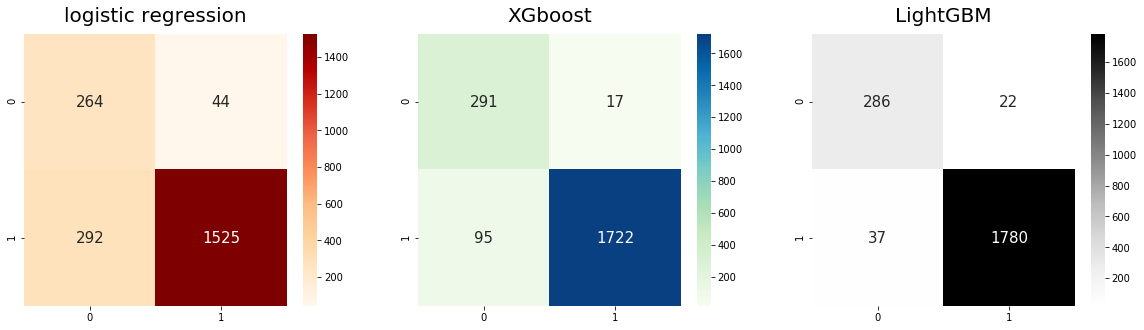

In [ ]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 5))

confu = confusion_matrix(y_true = y_test, y_pred = clf_LR_pred2)
confu2 = confusion_matrix(y_true = y_test, y_pred = clf_XGB2_pred)
confu3 = confusion_matrix(y_true = y_test, y_pred = clf_LGBM2_pred)


sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g', ax=ax[0])
sns.heatmap(confu2, annot=True, annot_kws={'size':15}, cmap='GnBu', fmt='.10g', ax=ax[1])
sns.heatmap(confu3, annot=True, annot_kws={'size':15}, cmap='Greys', fmt='.10g', ax=ax[2])
ax[0].set_title('logistic regression',pad = 12, fontsize = 20)
ax[1].set_title('XGboost',pad = 12, fontsize = 20)
ax[2].set_title('LightGBM',pad = 12, fontsize = 20)
plt.show()

<font color=#cccccc> Model stacking</font>
==

In [ ]:
models = [ LogisticRegression(random_state=0),
           XGBClassifier(random_state=0),
           LGBMClassifier(random_state=0)] 

In [ ]:
S_train, S_test = stacking(models, 
                           x_train_transformed_resample, over_y_train, x_test_transformed_resample, 
                           regression = False, 
                           metric = accuracy_score, 
                           n_folds = 4, stratified = True, shuffle = True, 
                           random_state = 0, verbose = 0) 

In [ ]:
pd.DataFrame(S_train)
clf_STACK = XGBClassifier(seed = 0, \
                               n_jobs = -1,\
                               learning_rate = 0.08,\
                               n_estimators = 70,\
                               max_depth = 3)
clf_STACK = clf_STACK.fit(S_train, over_y_train)
clf_STACK_pred = clf_STACK.predict_proba(S_test) 
print('Final prediction score: [%.4f]' % accuracy_score(y_test, clf_XGB2.predict(x_test_transformed_resample)))

Final prediction score: [0.9473]



<font color=#cccccc>AUC score of other model</font>
==

In [ ]:
models = {"K-Nearest Neighbors   ": KNeighborsClassifier(),
          "Support Vector Machine": SVC(probability=True),
          "Decision Tree         ": DecisionTreeClassifier(),
          "Random Forest         ": RandomForestClassifier(),
          "Ada Boost             ": AdaBoostClassifier(),}

### <font color=yellow>Random Oversampling</font>

In [ ]:
for name, model in models.items():
    model.fit(x_train_transformed_resample, over_y_train)

# Print AUC score
print("Random Oversampling: AUC score")
for name, model in models.items():
    print(name + ": {:.3f}".format(roc_auc_score(y_test, model.predict(x_test_transformed_resample))))

Random Oversampling: AUC score
K-Nearest Neighbors   : 0.842
Support Vector Machine: 0.900
Decision Tree         : 0.875
Random Forest         : 0.886
Ada Boost             : 0.932


### <font color=yellow>SMOTE</font>

In [ ]:
smote_resample = preprocessor_pipe.transform(smote_x_train)

# Fit the models: SMOTE
for name, model in models.items():
    model.fit(smote_resample, smote_y_train)

# Print AUC score
print("SMOTE: AUC score")
for name, model in models.items():
    print(name + ": {:.3f}".format(roc_auc_score(y_test, model.predict(x_test_transformed))))

SMOTE: AUC score
K-Nearest Neighbors   : 0.835
Support Vector Machine: 0.872
Decision Tree         : 0.878
Random Forest         : 0.910
Ada Boost             : 0.908


### <font color=yellow>Borderline-SMOTE</font>

In [ ]:
bdlsmote_resample = preprocessor_pipe.transform(bdlsmote_x_train)
# Fit the models: Borderline-SMOTE
for name, model in models.items():
    model.fit(bdlsmote_resample, bdlsmote_y_train)

# Print AUC score
print("Borderline-SMOTE: AUC score")
for name, model in models.items():
    print(name + ": {:.3f}".format(roc_auc_score(y_test, model.predict(x_test_transformed))))

Borderline-SMOTE: AUC score
K-Nearest Neighbors   : 0.811
Support Vector Machine: 0.864
Decision Tree         : 0.893
Random Forest         : 0.900
Ada Boost             : 0.914


# <font color=#cccccc>Hyper parameter optimize</font>

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10,15,20],\
             'n_estimators':[100,70,50,30,20,10,5],\
              'learning_rate':[0.1,0.05,0.08]}

grid_XGB = GridSearchCV(clf_XGB2 , param_grid=parameters , scoring='accuracy',\
                        cv=5, refit=True)
grid_XGB.fit(x_train_transformed_resample , over_y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_XGB.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_XGB.best_score_))
best_XGB = grid_XGB.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_XGB.predict(x_test_transformed_resample)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 XGBClassifier 정확도 : {0:.4f}'.format(accuracy))

df_XGB = pd.DataFrame(grid_XGB.cv_results_)
pd.set_option('display.max.colwidth', 200)
df_XGB[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]\
.sort_values('rank_test_score').head(10)

GridSearchCV 최적 하이퍼 파라미터 : {'learning_rate': 0.08, 'max_depth': 20, 'n_estimators': 100}
GridSearchCV 최고 정확도: 0.9867
테스트 세트에서의 XGBClassifier 정확도 : 0.9652


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
119,"{'learning_rate': 0.08, 'max_depth': 20, 'n_estimators': 100}",0.986750,1,0.989163,0.987357,0.986145
35,"{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100}",0.986629,2,0.989163,0.986153,0.985542
21,"{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}",0.986509,3,0.989163,0.986755,0.986145
112,"{'learning_rate': 0.08, 'max_depth': 15, 'n_estimators': 100}",0.986509,4,0.989163,0.986755,0.984940
28,"{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}",0.986389,5,0.988561,0.986153,0.986145
105,"{'learning_rate': 0.08, 'max_depth': 10, 'n_estimators': 100}",0.986268,6,0.987959,0.987357,0.986145
29,"{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 70}",0.986148,7,0.987959,0.985551,0.986145
36,"{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 70}",0.985907,8,0.987959,0.985551,0.986145
22,"{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 70}",0.985907,9,0.987959,0.986153,0.986747
120,"{'learning_rate': 0.08, 'max_depth': 20, 'n_estimators': 70}",0.985545,10,0.987959,0.986153,0.985542


# <font color=#cccccc>DL Model 적용</font>

### <font color=yellow>Library Import</font>

In [ ]:
import tensorflow as tf


from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics
from sklearn import preprocessing

import os
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
print(x_train_transformed_resample.shape)
print(over_y_train.shape)
print(x_test_transformed_resample.shape)
print(y_test.shape)

y_test = y_test.values.reshape(-1,1)
over_y_train = over_y_train.values.reshape(-1,1)
print('===========y data 2차원으로 변환==============')
print(x_train_transformed_resample.shape)
print(over_y_train.shape)
print(x_test_transformed_resample.shape)
print(y_test.shape)

### <font color=yellow>1st_elu_hidden layer3_Dropout</font>

In [ ]:
enc = preprocessing.OneHotEncoder(categories='auto')

train_label = enc.fit_transform(over_y_train).toarray()
test_label = enc.fit_transform(y_test).toarray()

print(train_label.shape)
print(test_label.shape) 


model = models.Sequential() # Build up the "Sequence" of layers (Linear stack of layers)

# Dense-layer (with he-initialization)
model.add(layers.Dense(input_dim=34, units=256, activation=None, kernel_initializer=initializers.he_uniform())) # he-uniform initialization
# model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # elu or relu (or layers.ELU / layers.LeakyReLU)

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.5)) # Dropout-layer

model.add(layers.Dense(units=2, activation='softmax')) # Apply softmax function on model's output



model.compile(optimizer=optimizers.Adam(), # Please try the Adam-optimizer
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy])


history = model.fit(x_train_transformed_resample, train_label, batch_size=100, epochs=20, validation_split=0.3) 

(8302, 34)
(8302, 1)
(2125, 34)
(2125, 1)


In [ ]:
result = model.evaluate(x_test_transformed_resample, test_label)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

2125/2125 [==============================] - 0s 69us/sample - loss: 0.3265 - categorical_accuracy: 0.9299
loss (cross-entropy) : 0.3265257748369785
test accuracy : 0.92988235


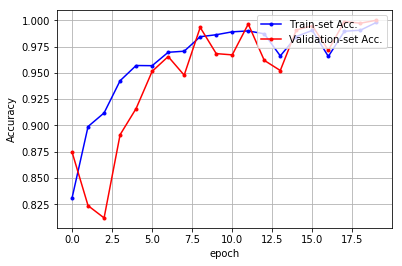

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

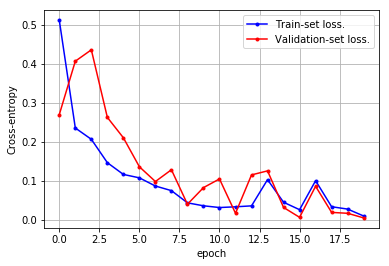

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(acc))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.show()

### <font color=yellow>2nd_relu_hidden layer1_Dropout</font>

In [ ]:
model_over_relu_R = models.Sequential() # Build up the "Sequence" of layers (Linear stack of layers)

# Dense-layer (with he-initialization)
model_over_relu_R.add(layers.Dense(input_dim=34, units=256, activation=None, kernel_initializer=initializers.he_uniform())) # he-uniform initialization
# model.add(layers.BatchNormalization()) # Use this line as if needed
model_over_relu_R.add(layers.Activation('relu')) # elu or relu (or layers.ELU / layers.LeakyReLU)

model_over_relu_R.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model_over_relu_R.add(layers.Activation('relu')) 

model_over_relu_R.add(layers.Dropout(rate=0.2)) # Dropout-layer

model_over_relu_R.add(layers.Dense(units=2, activation='softmax')) 

model_over_relu_R.compile(optimizer=optimizers.Adam(), # Please try the Adam-optimizer, Adam(학습률)
              loss=losses.binary_crossentropy, 
              metrics=[tf.keras.metrics.Recall()])

history_rec = model_over_relu_R.fit(x_train_transformed_resample, train_label, batch_size=10, epochs=20, validation_split=0.3) 

Train on 5811 samples, validate on 2491 samples
Epoch 1/20
5811/5811 [==============================] - 4s 712us/sample - loss: 0.3312 - recall_2: 0.8597 - val_loss: 0.5280 - val_recall_2: 0.7499
Epoch 2/20
5811/5811 [==============================] - 3s 540us/sample - loss: 0.2118 - recall_2: 0.9126 - val_loss: 0.1555 - val_recall_2: 0.9402
Epoch 3/20
5811/5811 [==============================] - 3s 537us/sample - loss: 0.1732 - recall_2: 0.9315 - val_loss: 0.2426 - val_recall_2: 0.8964
Epoch 4/20
5811/5811 [==============================] - 3s 509us/sample - loss: 0.1443 - recall_2: 0.9420 - val_loss: 0.2799 - val_recall_2: 0.8816
Epoch 5/20
5811/5811 [==============================] - 3s 500us/sample - loss: 0.1163 - recall_2: 0.9558 - val_loss: 0.0806 - val_recall_2: 0.9783
Epoch 6/20
5811/5811 [==============================] - 3s 519us/sample - loss: 0.0993 - recall_2: 0.9621 - val_loss: 0.1686 - val_recall_2: 0.9374
Epoch 7/20
5811/5811 [==============================] - 3s 509us

In [ ]:
result = model_over_relu_R.evaluate(x_test_transformed_resample, test_label)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

2125/2125 [==============================] - 0s 42us/sample - loss: 0.3563 - recall_2: 0.9304
loss (cross-entropy) : 0.3562941450897385
test accuracy : 0.9303529


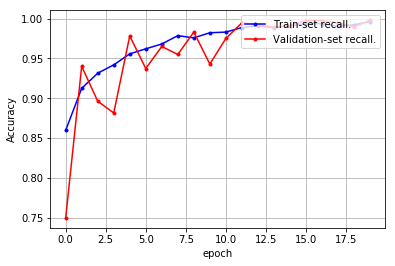

In [ ]:
acc = history_rec.history['recall_2']
val_acc = history_rec.history['val_recall_2']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set recall.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set recall.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
history_rec.history

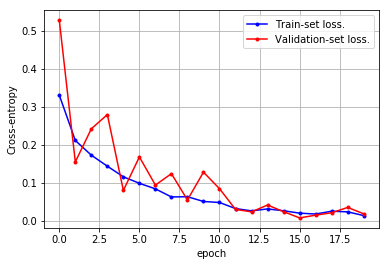

In [ ]:
loss = history_rec.history['loss']
val_loss = history_rec.history['val_loss']

x_len = np.arange(len(acc))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.show()